In [208]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

Importing data from URL

In [6]:
url = "https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv"
dataframe = pd.read_csv(url)
dataframe.head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


Percentage of null values in dataframe

In [7]:
dataframe.isnull().mean()

Name        0.000000
PClass      0.000000
Age         0.424219
Sex         0.000000
Survived    0.000000
SexCode     0.000000
dtype: float64

Datatypes of all the columns in datframe

In [9]:
dataframe.dtypes

Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
SexCode       int64
dtype: object

Shape of the dataframe

In [11]:
dataframe.shape

(1313, 6)

Description of numerical columns of the dataframe

In [12]:
dataframe.describe()

,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


Dataframe iloc and loc parameter

In [18]:
dataframe.iloc[1:4]

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


In [19]:
dataframe.loc[1:4]

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


Changing the indexing of dataframe

In [21]:
dataframe1 = dataframe.copy()

In [27]:
dataframe1.set_index('Name', inplace=True)

In [36]:
dataframe1.iloc[1:4]

,PClass,Age,Sex,Survived,SexCode
Name,,,,,
"Allison, Miss Helen Loraine",1st,2.0,female,0,1
"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


In [37]:
dataframe1.loc[1:4]

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

In [38]:
dataframe1.loc['Allison, Miss Helen Loraine']

PClass         1st
Age            2.0
Sex         female
Survived         0
SexCode          1
Name: Allison, Miss Helen Loraine, dtype: object

Filtering the data from dataframe

In [55]:
dataframe[(dataframe['Sex'] == 'female') | (dataframe['Age'] >= 65)].shape  # or : |,  and = &

(469, 6)

In [41]:
dataframe[dataframe['Sex'] == 'male'].shape

(851, 6)

In [42]:
dataframe[dataframe['Sex'] == 'female'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


Replacing values in dataframe

In [62]:
dataframe['Sex'].replace(['female','male'],['Women', 'Men'],inplace=True)

In [63]:
dataframe['Sex'].unique()

array(['Women', 'Men'], dtype=object)

In [81]:
mappedDataframe = dataframe.copy()
mappedDataframe['Sex'] = mappedDataframe['Sex'].map({'Women': 'female', 'Men': 'male'})

In [83]:
mappedDataframe['Sex'].unique()

array(['female', 'male'], dtype=object)

In [71]:
dataframe.replace(1,'One').head(5)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,Women,One,One
1,"Allison, Miss Helen Loraine",1st,2.0,Women,0,One
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,Men,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,Women,0,One
4,"Allison, Master Hudson Trevor",1st,0.92,Men,One,0


Rename Columns

In [84]:
dataframe.rename(columns={'PClass':'Passenger Class'}).head(2)

,Name,Passenger Class,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,Women,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,Women,0,1


Finding Minimum, Maximum, Sum, Average and Count

In [85]:
print('Minimum:', dataframe['Age'].min())
print('Maximum:', dataframe['Age'].max())
print('Mean:', dataframe['Age'].mean())
print('Sum:', dataframe['Age'].sum())
print('Count:', dataframe['Age'].count())

Minimum: 0.17
Maximum: 71.0
Mean: 30.397989417989418
Sum: 22980.88
Count: 756


Finding Null values

In [86]:
dataframe[dataframe['Age'].isnull()].head(3)

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,Women,1,1
13,"Barkworth, Mr Algernon H",1st,NaN,Men,1,0
14,"Baumann, Mr John D",1st,NaN,Men,0,0


Replace null values

In [90]:
dataframe['Sex'].replace('Men', np.nan)

0       Women
1       Women
2         NaN
3       Women
4         NaN
        ...  
1308      NaN
1309      NaN
1310      NaN
1311      NaN
1312      NaN
Name: Sex, Length: 1313, dtype: object

Droping columns from dataframe

In [91]:
dataframe.drop('Age', axis=1).head(2)

,Name,PClass,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,Women,1,1
1,"Allison, Miss Helen Loraine",1st,Women,0,1


In [92]:
dataframe1.head(2)

,PClass,Age,Sex,Survived,SexCode
Name,,,,,
"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [93]:
del(dataframe1['Age'])

In [94]:
dataframe1.head(2)

,PClass,Sex,Survived,SexCode
Name,,,,
"Allen, Miss Elisabeth Walton",1st,female,1,1
"Allison, Miss Helen Loraine",1st,female,0,1


Deleting rows form dataframe

In [95]:
dataframe1[dataframe1['Sex'] != 'female'].head(3)

,PClass,Sex,Survived,SexCode
Name,,,,
"Allison, Mr Hudson Joshua Creighton",1st,male,0,0
"Allison, Master Hudson Trevor",1st,male,1,0
"Anderson, Mr Harry",1st,male,1,0


Unique values in dataframe

In [104]:
print('Unique Values Label: ', dataframe['Sex'].unique())
print('Number of Unique Values: ', dataframe['Sex'].nunique())
print('Unique Values Label Count: \n', dataframe['Sex'].value_counts(dropna=False))

Unique Values Label:  ['Women' 'Men']
Number of Unique Values:  2
Unique Values Label Count: 
 Men      851
Women    462
Name: Sex, dtype: int64


Grouping the data from dataframe

In [110]:
dataframe.groupby('Sex').mean()

,Age,Survived,SexCode
Sex,,,
Men,31.014338,0.166863,0.0
Women,29.396424,0.666667,1.0


In [116]:
dataframe.groupby('Survived')['Name'].count()

Survived
0    863
1    450
Name: Name, dtype: int64

In [118]:
dataframe.groupby('Survived').count()

,Name,PClass,Age,Sex,SexCode
Survived,,,,,
0,863,863,443,863,863
1,450,450,313,450,450


Loop over dataframe column values

In [119]:
for name in dataframe['Name'][0:2]:
    print(name.upper())

ALLEN, MISS ELISABETH WALTON
ALLISON, MISS HELEN LORAINE


In [120]:
[name.upper() for name in dataframe['Name'][0:3]]

['ALLEN, MISS ELISABETH WALTON',
 'ALLISON, MISS HELEN LORAINE',
 'ALLISON, MR HUDSON JOSHUA CREIGHTON']

Applying function on a column

In [130]:
def uppercase(x):
    return x.upper()

newColumn = dataframe['Name'].apply(uppercase)[0:3]
dataframe['New'] = newColumn
dataframe.head(3)

,Name,PClass,Age,Sex,Survived,SexCode,New
0,"Allen, Miss Elisabeth Walton",1st,29.0,Women,1,1,"ALLEN, MISS ELISABETH WALTON"
1,"Allison, Miss Helen Loraine",1st,2.0,Women,0,1,"ALLISON, MISS HELEN LORAINE"
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,Men,0,0,"ALLISON, MR HUDSON JOSHUA CREIGHTON"


In [131]:
dataframe.groupby('Sex').apply(lambda x: x.count())

,Name,PClass,Age,Sex,Survived,SexCode,New
Sex,,,,,,,
Men,851,851,468,851,851,851,1
Women,462,462,288,462,462,462,2


Interaction with dataframes

1. Concatenating

In [159]:
data_a = {
    'id':['1','2','3'],
    'first':['Alex', 'Amy', 'Allen'],
    'last':['Anderson','Ackerman','Ali']
}
dataframe_a = pd.DataFrame(data_a, columns=['id','first','last'])

data_b = {
    'id':['5','6','7'],
    'first':['Billy', 'Brian', 'Bran'],
    'last':['Bonder','Black','Balwner']
}
dataframe_b = pd.DataFrame(data_b, columns=['id','first','last'])

In [154]:
dataframe_a, dataframe_b

(  id  first      last
 0  1   Alex  Anderson
 1  2    Amy  Ackerman
 2  3  Allen       Ali
 3  4  Billy    Bonder,
   id  first     last
 0  5  Billy   Bonder
 1  6  Brian    Black
 2  7   Bran  Balwner)

In [163]:
pd.concat([dataframe_a, dataframe_b], ignore_index=True)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,5,Billy,Bonder
4,6,Brian,Black
5,7,Bran,Balwner


In [162]:
pd.concat([dataframe_a, dataframe_b], axis=1)

,id,first,last,id,first,last
0,1,Alex,Anderson,5,Billy,Bonder
1,2,Amy,Ackerman,6,Brian,Black
2,3,Allen,Ali,7,Bran,Balwner


In [161]:
pd.concat([dataframe_a, dataframe_b], axis=0)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
0,5,Billy,Bonder
1,6,Brian,Black
2,7,Bran,Balwner


Merging Dataframes

In [187]:
empl_data = {
    'id':['1','2','3'],
    'name':['Alex', 'Amy', 'Allen']
}
dataframe_a = pd.DataFrame(empl_data, columns=['id','name'])

sale_data = {
    'sale_id':['3','4','5'],
    'total_sale':['1000','2000','3000']
}
dataframe_b = pd.DataFrame(sale_data, columns=['sale_id','total_sale'])

In [188]:
pd.merge(dataframe_a, dataframe_b, left_on='id', right_on='sale_id')

,id,name,sale_id,total_sale
0,3,Allen,3,1000


In [190]:
pd.merge(dataframe_a, dataframe_b, how='left',left_on='id', right_on='sale_id')

,id,name,sale_id,total_sale
0,1,Alex,NaN,NaN
1,2,Amy,NaN,NaN
2,3,Allen,3,1000


In [204]:
dataframe_a.set_index('id', inplace=True)
dataframe_b.set_index('sale_id', inplace=True)
pd.merge(dataframe_a, dataframe_b, left_index=True, right_index=True)

,name,total_sale
3,Allen,1000


In [205]:
dataframe_a

,name
id,
1,Alex
2,Amy
3,Allen


In [206]:
dataframe_b

,total_sale
sale_id,
3,1000
4,2000
5,3000


Normalization

In [225]:
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

array_test = np.arange(10,3000,3)

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([   0. ,  299.7,  599.4,  899.1, 1198.8, 1498.5, 1798.2, 2097.9,
        2397.6, 2697.3, 2997. ]),
 <BarContainer object of 10 artists>)

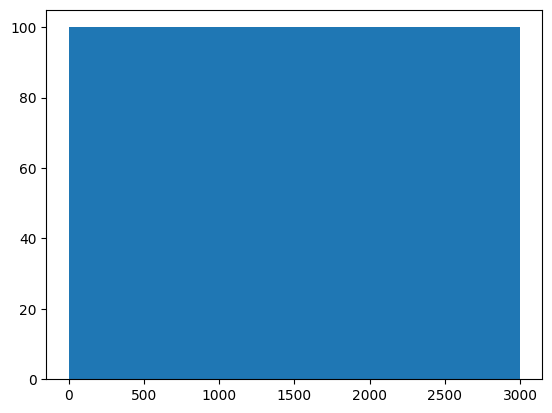

In [224]:
import matplotlib.pyplot as plt
plt.hist(array_test)

In [210]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [211]:
scaled_feature = minmax_scale.fit_transform(feature)

In [212]:
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

Standardization

In [226]:
X = np.array([[-1000.1],
                    [-200.2],
                    [500.5],
                    [600.6],
                    [900.9]])

In [227]:
scaler = preprocessing.StandardScaler()

In [228]:
standardized = scaler.fit_transform(X)

In [229]:
standardized

array([[-1.69825773],
       [-0.52763593],
       [ 0.49781062],
       [ 0.64430298],
       [ 1.08378007]])